
# Intro

My first attempt at a kaggle competition. This time tackling the titanic dataset.

Built by Nicholas Axl

In [52]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk
from matplotlib import rcParams
from sklearn.impute import SimpleImputer

import os
for dirtname, _, filenames in os.walk('/sample_data'):
  for filename in filenames:
          print(os.path.join(dirname, filename))

In [53]:
train_data = pd.read_csv("./sample_data/train.csv")
train_data.head(5)
tr_idx = train_data['Survived'].notnull()

In [54]:
test_data = pd.read_csv("./sample_data/test.csv")
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


Double checking for missing columns


In [55]:
df_train = pd.DataFrame(train_data)
df_test = pd.DataFrame(test_data)
print(len(df_train.columns))
print(len(df_test.columns))

12
11


Exploratory Data Analysis

In [56]:
train_data.shape

(891, 12)

In [57]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [58]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [60]:
train_data.describe().columns

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

Fixing Missing Data

C:\Users\Axl\AppData\Local\Temp\ipykernel_5052\158391692.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=train_data, palette='Blues_r')


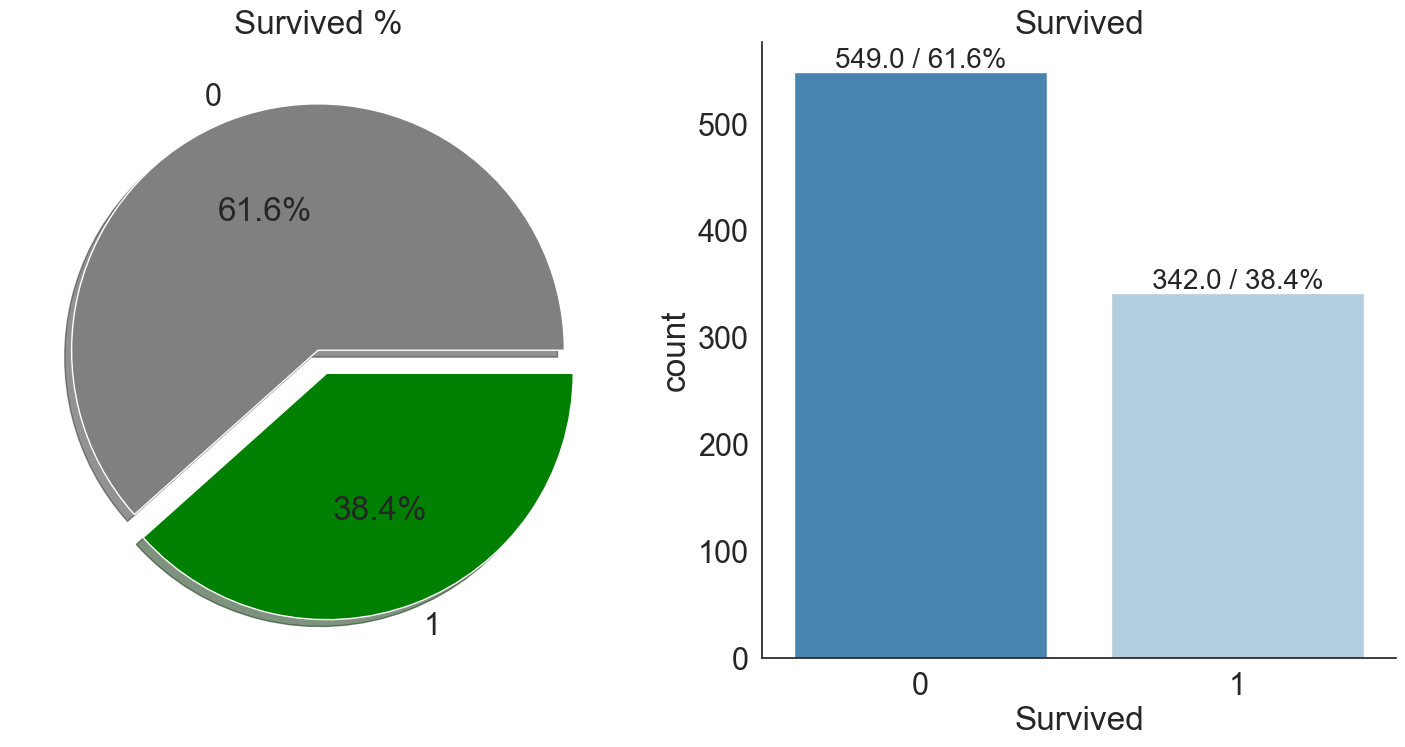

In [61]:
total_cnt = train_data['Survived'].count()
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
f, ax = plt.subplots(1, 2, figsize = (18, 8))
train_data['Survived'].value_counts().plot.pie(explode = [0, 0.1], 
                                               autopct = '%1.1f%%', 
                                               ax = ax[0],
                                               shadow = True,
                                               colors = ['grey', 'green'])
ax[0].set_title('Survived %')
ax[0].set_ylabel('')
sns.countplot(x='Survived', data=train_data, palette='Blues_r')
ax[1].set_title('Survived')
for p in ax[1].patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax[1].text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

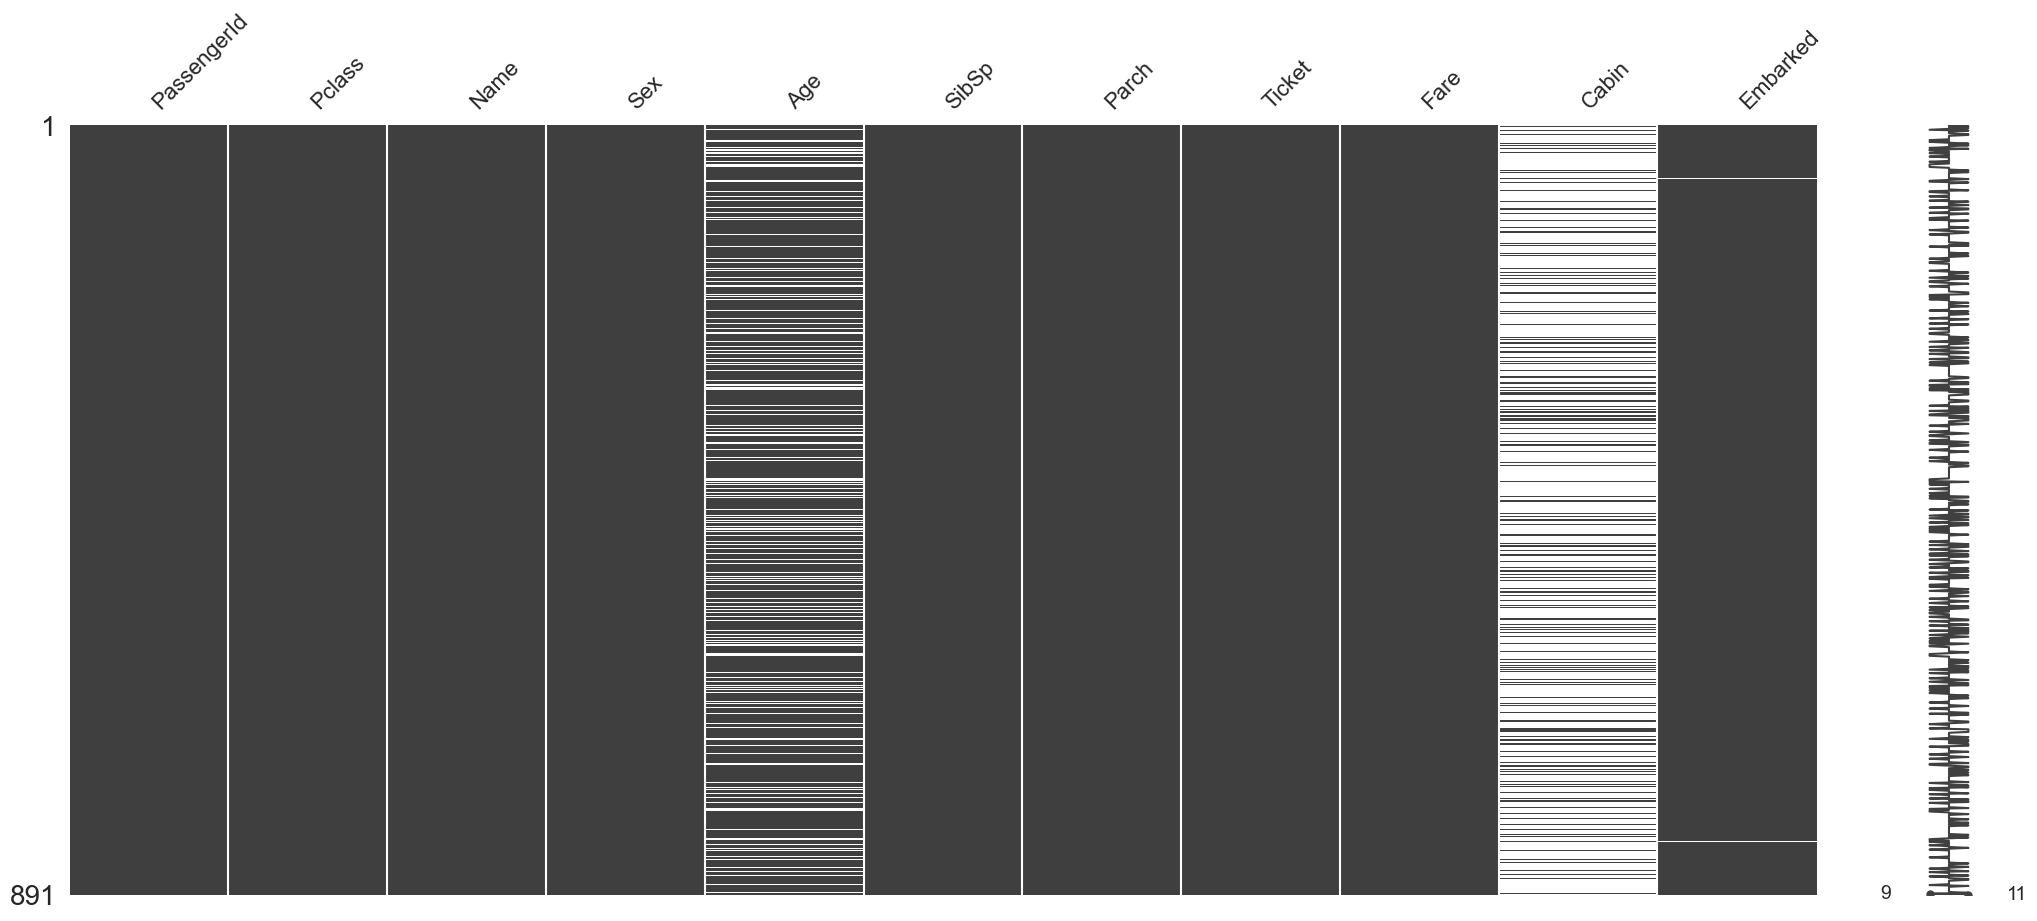

In [62]:
import missingno as msno
msno.matrix(train_data.drop(['Survived'],axis=1))
train_data.drop(['Survived'],axis=1).isnull().sum()

Exploring the Age column

Age mean: 29.70, std: 14.53, skew: 0.39


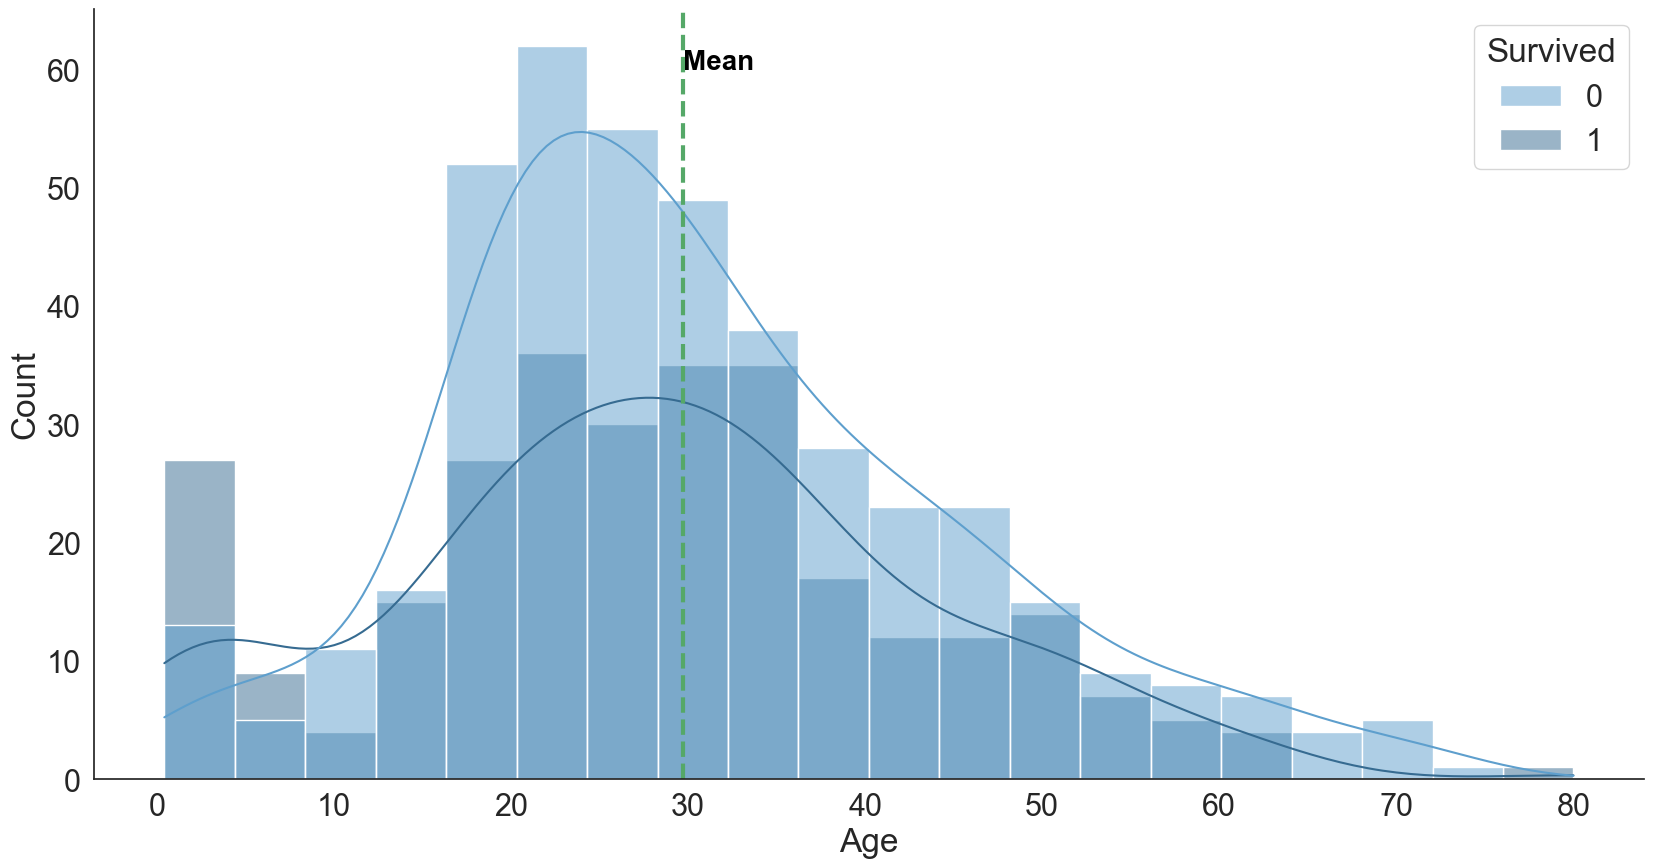

In [63]:
ax = sns.histplot(x="Age", hue="Survived", data=train_data,palette = 'Blues_d',kde=True)
plt.axvline(x=train_data['Age'].mean(), color='g', linestyle='--', linewidth=3)
plt.text(train_data['Age'].mean(), 60, "Mean", horizontalalignment='left', size='small', color='black', weight='semibold')
sns.despine()
age_mean = train_data['Age'].mean()
age_std = train_data['Age'].std()
age_skew = train_data['Age'].skew()
print('Age mean: {:.2f}, std: {:.2f}, skew: {:.2f}'.format(age_mean, age_std, age_skew))

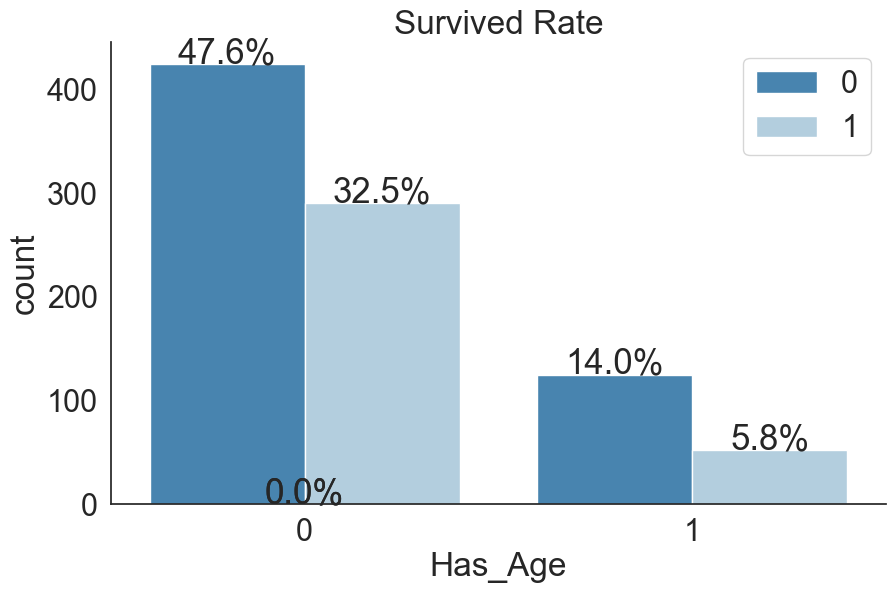

In [64]:
train_data['Age'].isnull().sum()
train_data['Has_Age'] = train_data['Age'].isnull().astype(int)
rcParams['figure.figsize'] = 10,6
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
ax = sns.countplot(x='Has_Age',hue ='Survived',data=train_data,palette="Blues_r")
plt.legend(loc = 'upper right')
ax.set_title('Survived Rate')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10,f'{height / total_cnt * 100:2.1f}%',va='center', ha='center', size=25)
sns.despine()

Attempt to use sklearn's multivariate feature imputation

In [65]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imp = IterativeImputer(max_iter=10, random_state=0)
train_data[['Age_iter']] = imp.fit_transform(train_data[['Age']])
pd.concat([train_data['Age'], train_data['Age_iter']], axis=1).head(10)

,Age,Age_iter
0,22.0,22.000000
1,38.0,38.000000
2,26.0,26.000000
3,35.0,35.000000
4,35.0,35.000000
5,NaN,29.699118
6,54.0,54.000000
7,2.0,2.000000
8,27.0,27.000000
9,14.0,14.000000


Imputations for Cabin

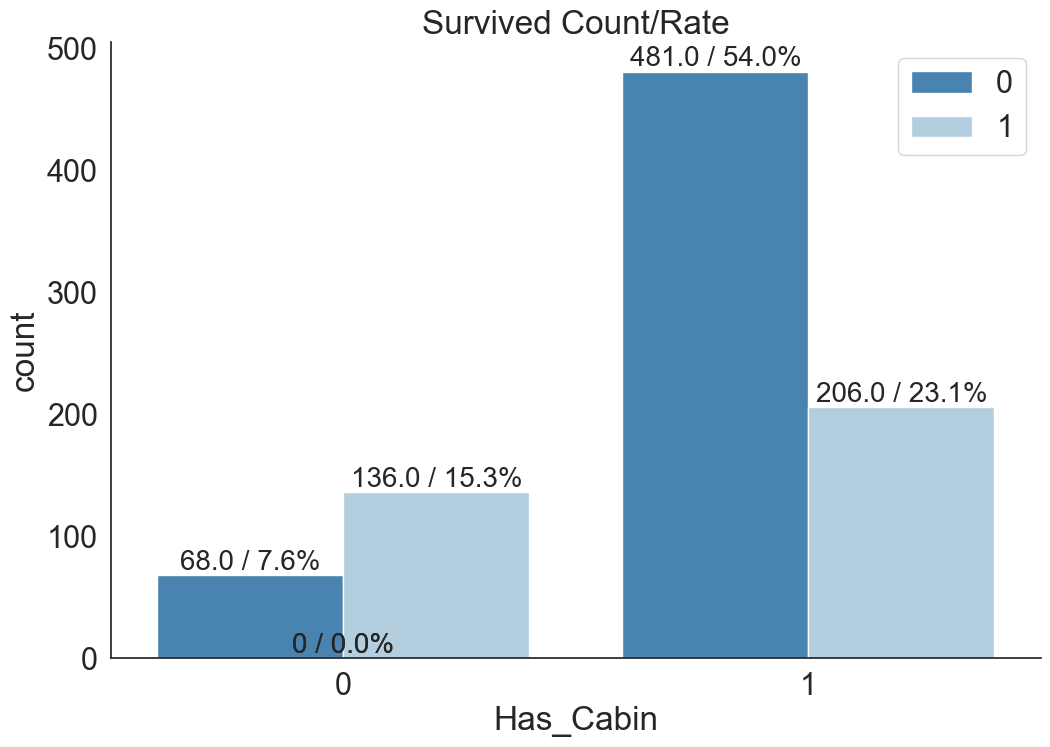

In [66]:
train_data['Has_Cabin'] = train_data['Cabin'].isnull().astype(int)
total_cnt = train_data['Survived'].count()
rcParams['figure.figsize'] = 12,8
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(x="Has_Cabin",
                   hue="Survived", 
                   data=train_data,
                   palette = 'Blues_r')
ax.set_title('Survived Count/Rate')
plt.legend(loc = 'upper right')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 10, f'{height} / {height / total_cnt * 100:2.1f}%', va='center', ha='center', size=20)
sns.despine()

C:\Users\Axl\AppData\Local\Temp\ipykernel_5052\1550472586.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', False)` for the same effect.

  ax = sns.barplot(x = 'Cabin_label', y = 'Survived', data = train_data, ci=False)


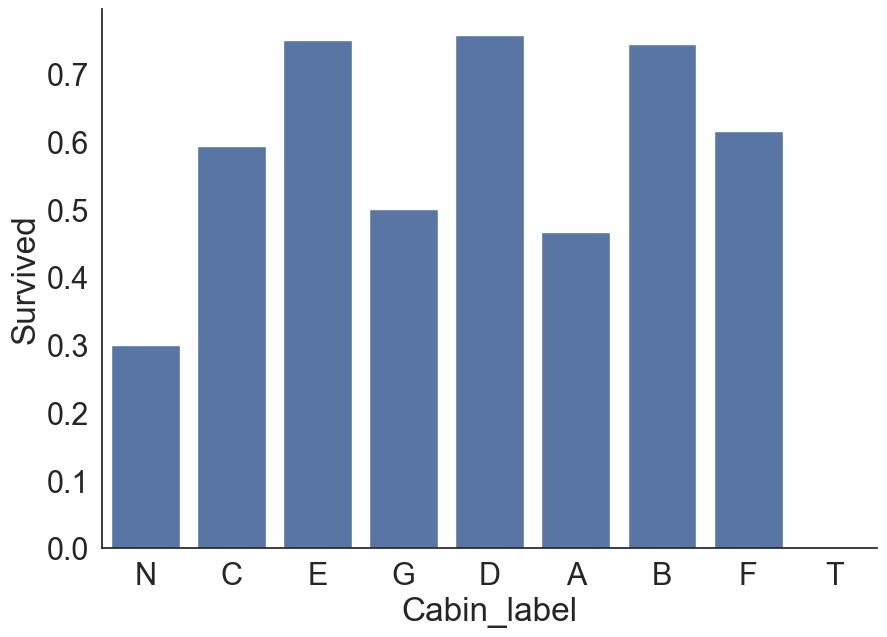

In [67]:
rcParams['figure.figsize'] = 10,7
sns.set(font_scale = 2)
sns.set_style("white")
train_data['Cabin'] = train_data['Cabin'].fillna('N')
train_data['Cabin_label'] = train_data['Cabin'].str.get(0)
ax = sns.barplot(x = 'Cabin_label', y = 'Survived', data = train_data, ci=False)
sns.despine()

Replace the missing NaN values with the string N since the column seems to be affecting survivability rate while also being unpredictable due to excess NaN values

(891, 16)

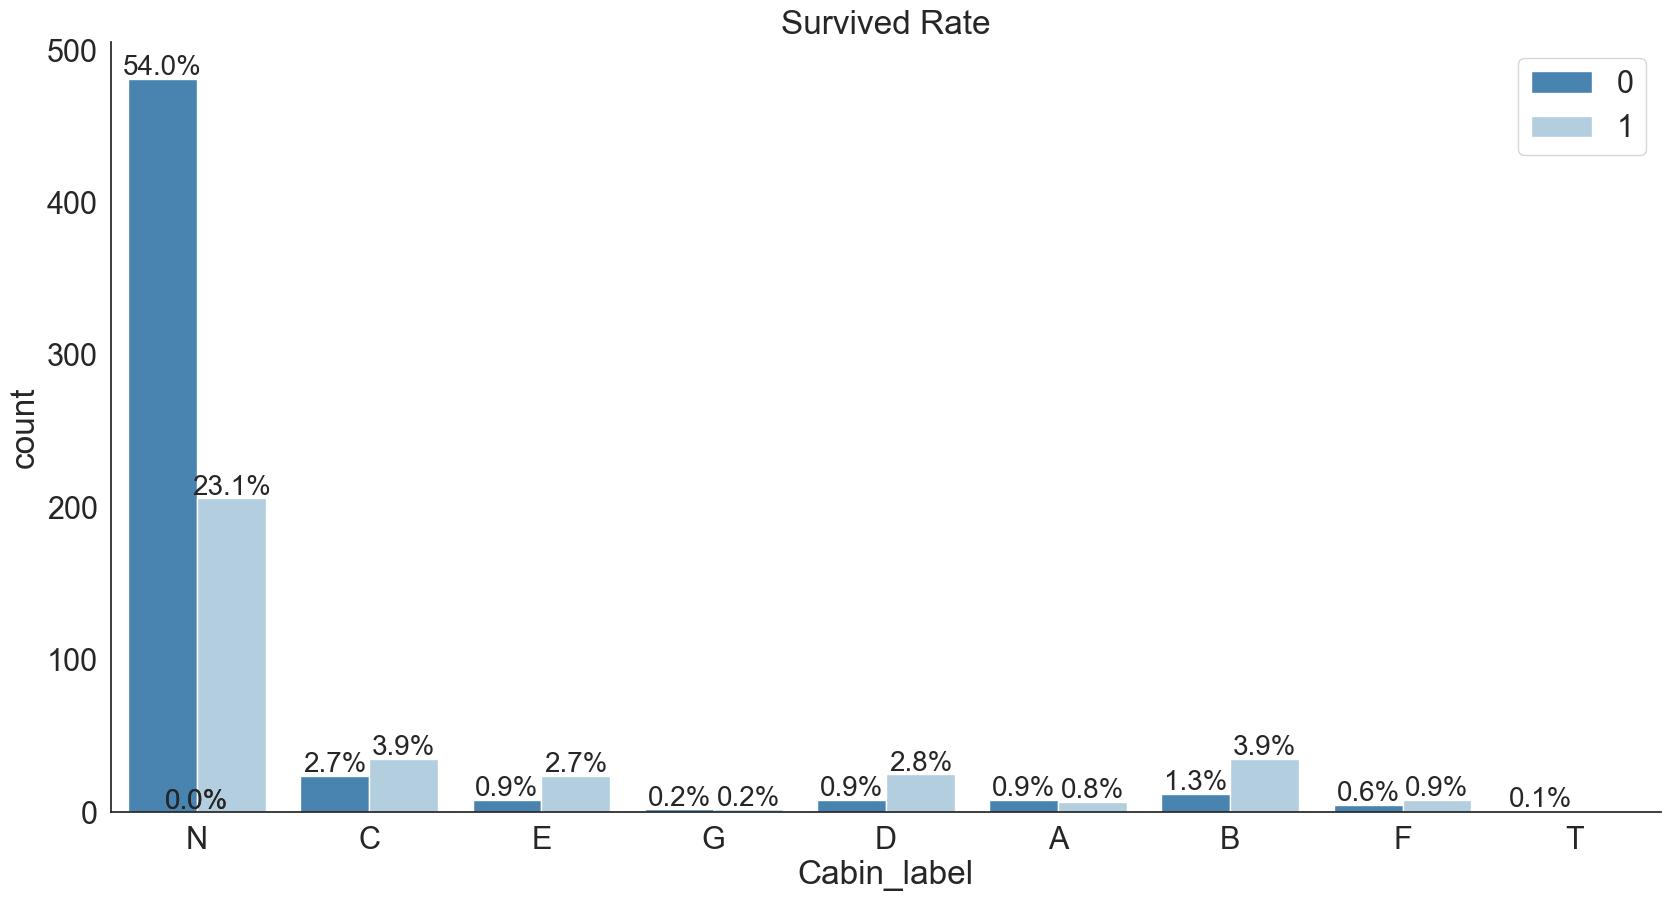

In [68]:
rcParams['figure.figsize'] = 20,10
sns.set(font_scale = 2)
sns.set_style("white")
ax = sns.countplot(x="Cabin_label", hue="Survived", data=train_data,palette = 'Blues_r')
ax.set_title('Survived Rate')
plt.legend(loc = 'upper right')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 7, f'{height / total_cnt * 100:2.1f}%',va='center', ha='center', size=20)
sns.despine()
train_data.shape

Check for remaining NaN values

Number of Missing Values in Dataset  2


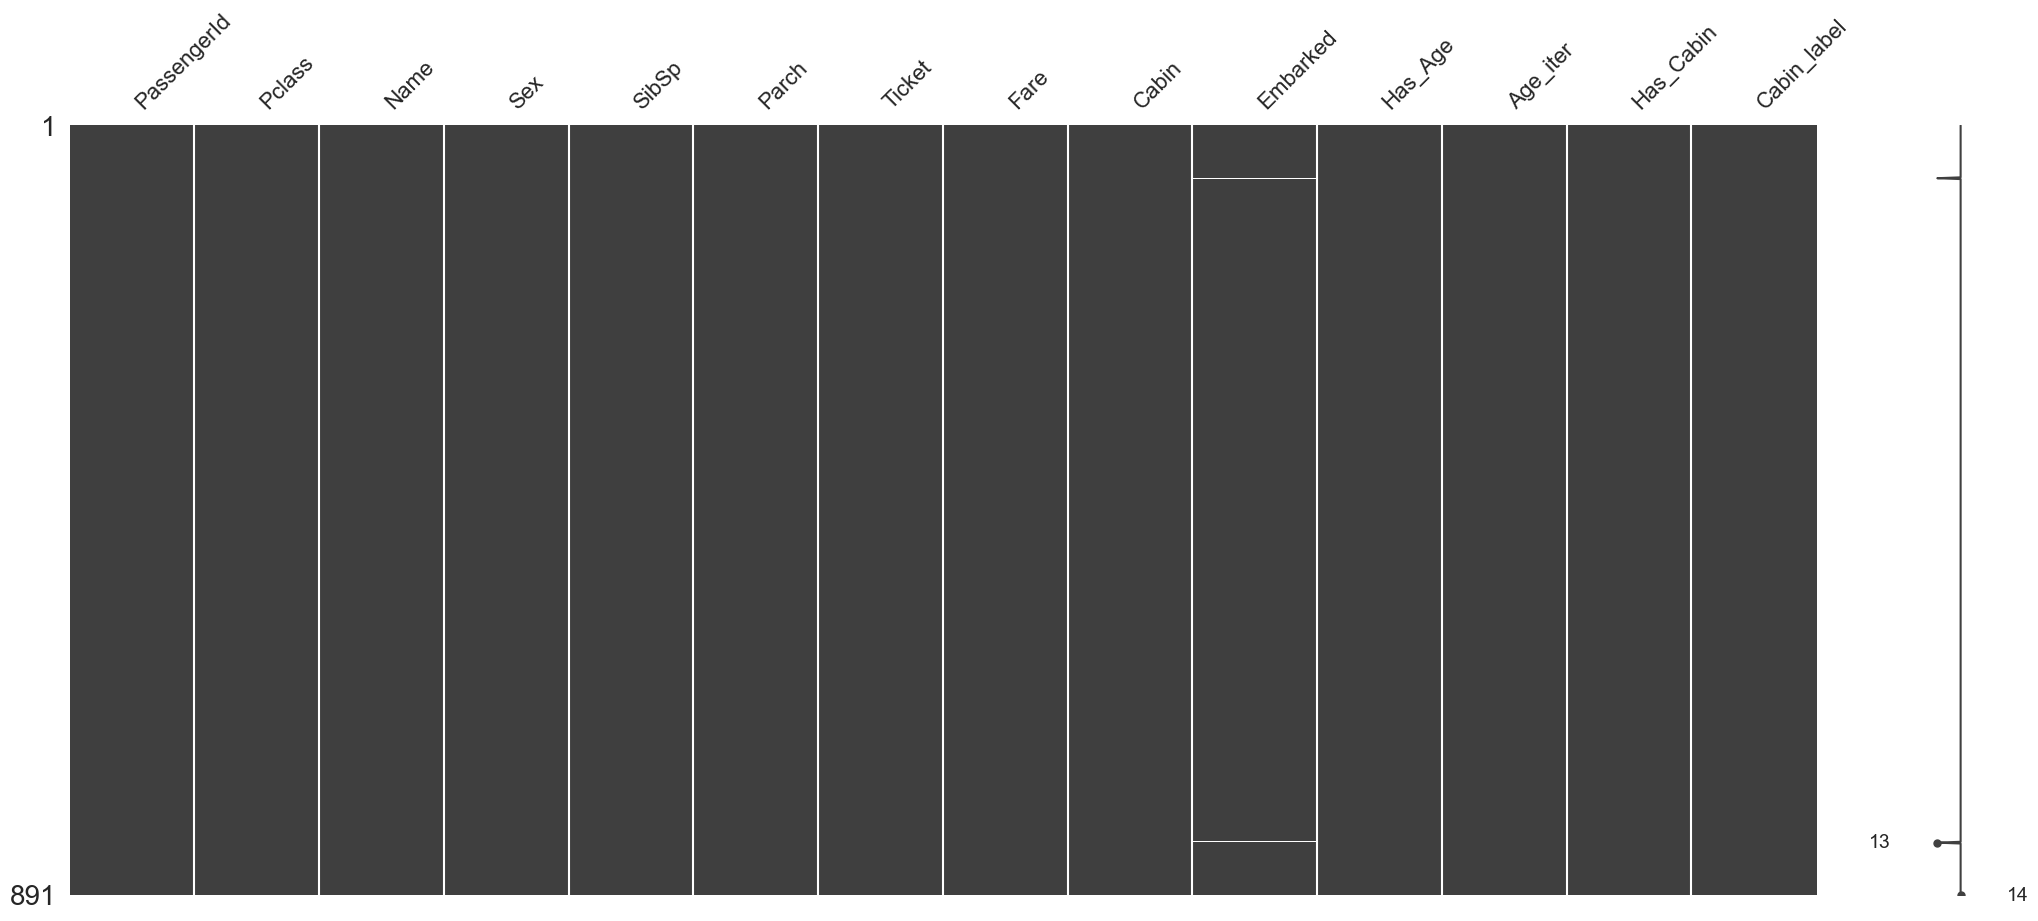

In [69]:
train_data = train_data.drop(['Age'] , axis=1)
msno.matrix(train_data.drop('Survived',axis=1))
print('Number of Missing Values in Dataset ',train_data.drop('Survived',axis=1).isnull().sum().sum())

In [70]:
train_data.shape

(891, 15)

Finishing filling up the embarked

Number of Missing Values in Dataset  0


<Axes: >

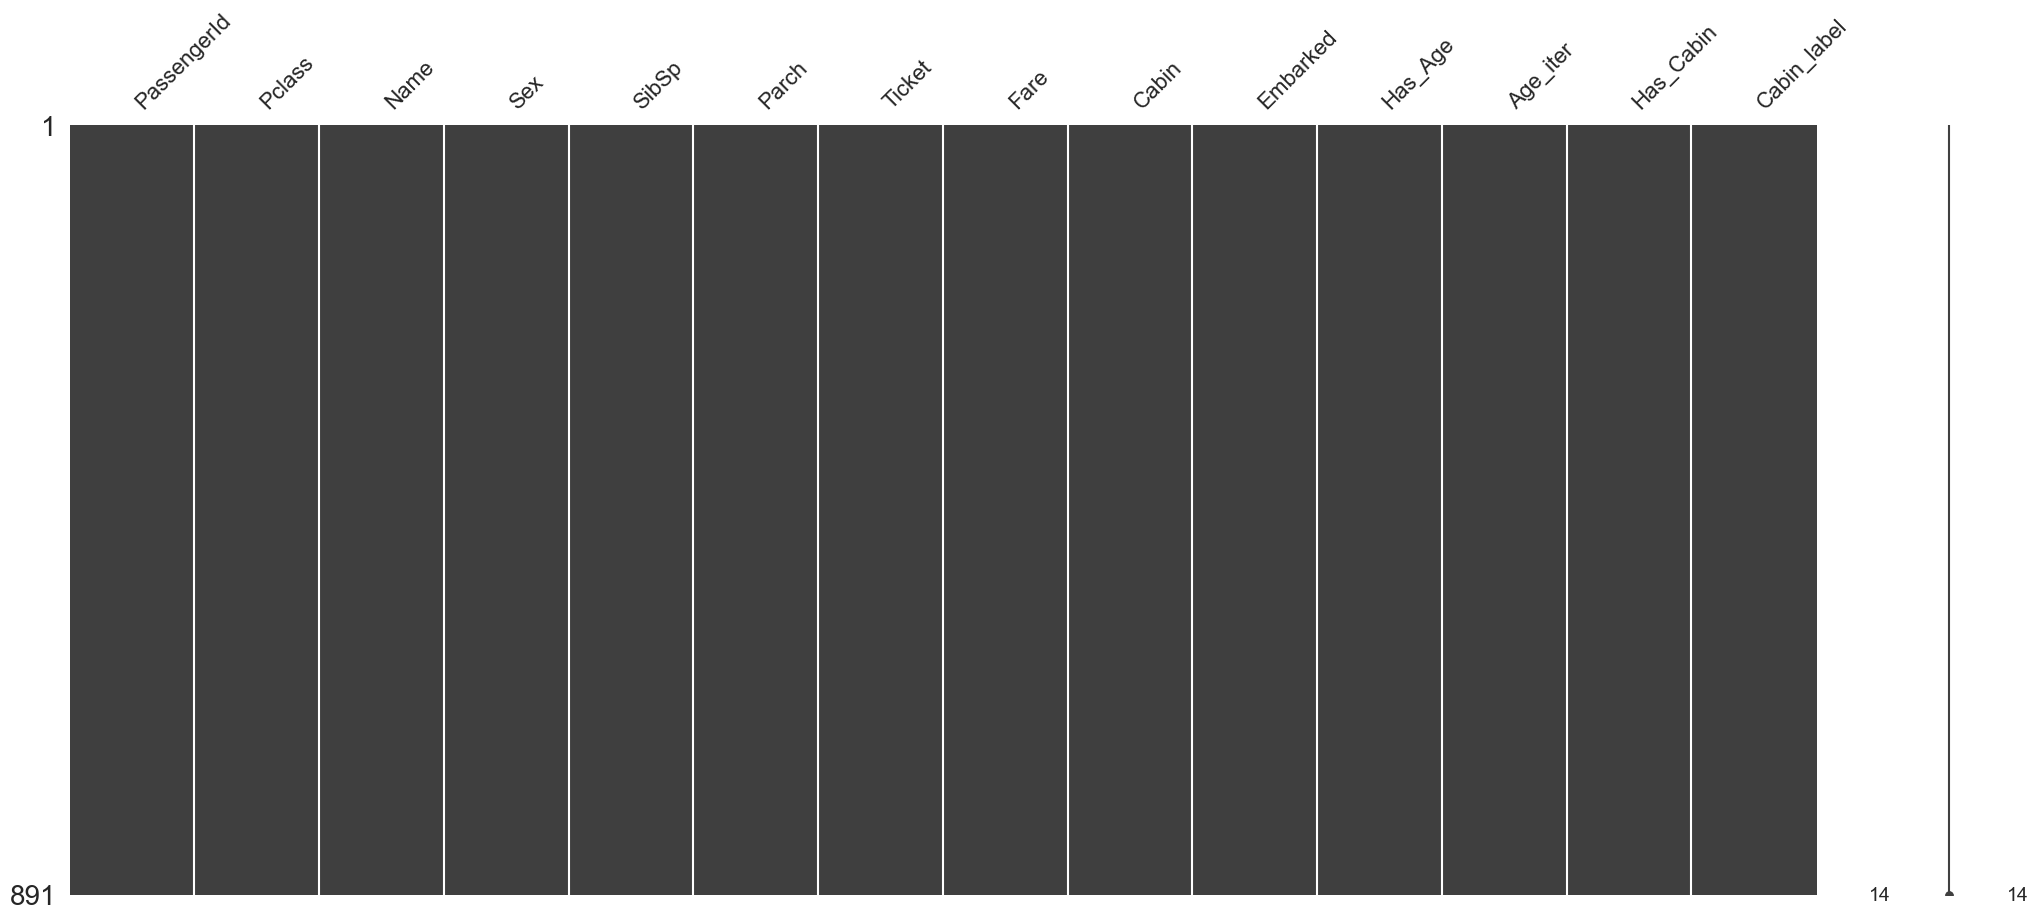

In [71]:
train_data['Embarked'].isnull().sum()
imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
train_data[['Embarked']] = imp.fit_transform(train_data[['Embarked']])
print('Number of Missing Values in Dataset ',train_data.drop('Survived',axis=1).isnull().sum().sum())
msno.matrix(train_data.drop('Survived',axis=1))


Finally predicting those who survived

We already know that cabin number and age has an affect. Now check for family size.

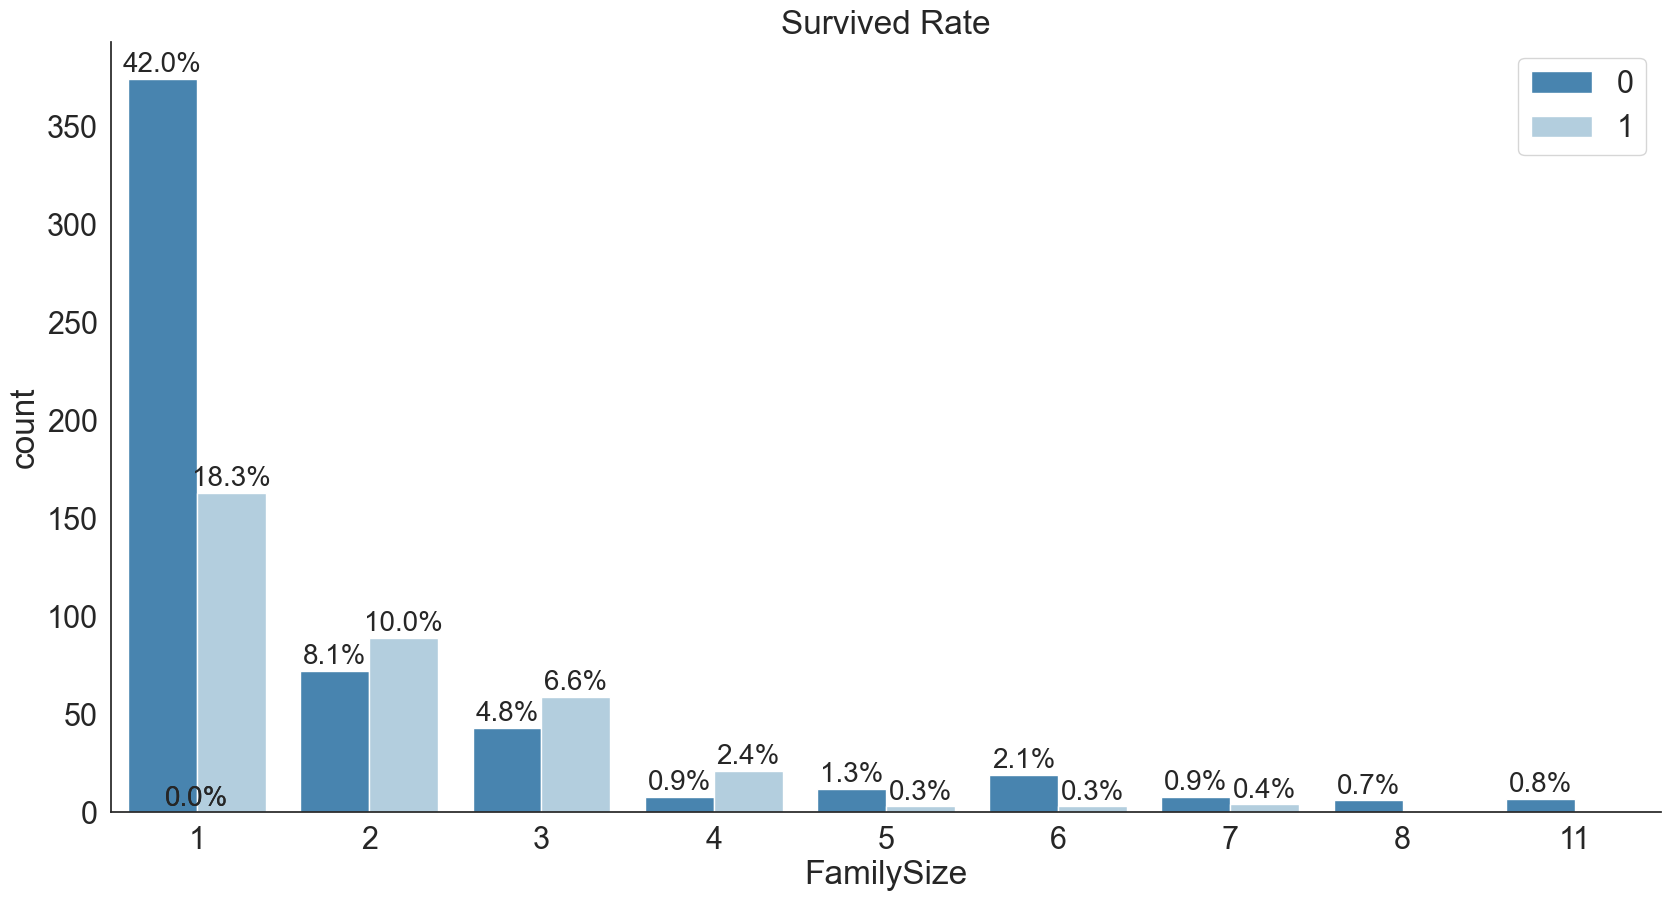

In [72]:
train_data['FamilySize'] = train_data['SibSp'] + train_data['Parch'] + 1
rcParams['figure.figsize'] = 20,10
sns.set(font_scale = 2)
sns.set_style("white")
sns.set_palette("bright")
ax = sns.countplot(x='FamilySize',hue ='Survived',data=train_data,palette="Blues_r")
ax.set_title('Survived Rate')
plt.legend(loc = 'upper right')
for p in ax.patches:
    x, height, width = p.get_x(), p.get_height(), p.get_width()
    ax.text(x + width / 2, height + 7, f'{height / total_cnt * 100:2.1f}%',va='center', ha='center', size=20)
sns.despine()

People boarding alone seemed to be dying more.

lastly, before putting the training data into a model, check for outliers. Use SKlearn/s PCA for this, the higher the value

In [97]:
print(train_data.columns)
train_data.info(5)
train_data.head(5)

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked', 'Has_Age', 'Age_iter',
       'Has_Cabin', 'Cabin_label', 'FamilySize'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          0 non-null      float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
 7   Ticket       891 non-null    object 
 8   Fare         891 non-null    float64
 9   Cabin        891 non-null    object 
 10  Embarked     891 non-null    object 
 11  Has_Age      891 non-null    int32  
 12  Age_iter     891 non-null    float64
 13  Has_Cabin    891 non-null    int32  
 14  

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Age,Age_iter,Has_Cabin,Cabin_label,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",NaN,1,0,A/5 21171,7.2500,N,S,0,22.0,1,N,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,1,0,PC 17599,71.2833,C85,C,0,38.0,0,C,2
2,3,1,3,"Heikkinen, Miss. Laina",NaN,0,0,STON/O2. 3101282,7.9250,N,S,0,26.0,1,N,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,1,0,113803,53.1000,C123,S,0,35.0,0,C,2
4,5,0,3,"Allen, Mr. William Henry",NaN,0,0,373450,8.0500,N,S,0,35.0,1,N,1


We want to work with Sex, FamilySize, Has_Cabin, Cabin_label, Embarked, Has_Age, Age_iter

In [96]:
dicsex = {"male": 0, "female": 1}
for dfsex in train_data, test_data:
    dfsex['Sex'] = dfsex['Sex'].map(dicsex)

test_data['FamilySize'] = test_data['SibSp'] + test_data['Parch'] + 1
test_data['Has_Cabin'] = test_data['Cabin'].isnull().astype(int)
test_data['Cabin_label'] = test_data['Cabin'].str.get(0)
test_data[['Age_iter']] = imp.fit_transform(test_data[['Age']])
test_data['Has_Age'] = test_data['Age'].isnull().astype(int)

In [98]:
test_data.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FamilySize,Has_Cabin,Cabin_label,Age_iter,Has_Age
0,892,3,"Kelly, Mr. James",NaN,34.5,0,0,330911,7.8292,NaN,Q,1,1,NaN,34.5,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",NaN,47.0,1,0,363272,7.0000,NaN,S,2,1,NaN,47.0,0
2,894,2,"Myles, Mr. Thomas Francis",NaN,62.0,0,0,240276,9.6875,NaN,Q,1,1,NaN,62.0,0
3,895,3,"Wirz, Mr. Albert",NaN,27.0,0,0,315154,8.6625,NaN,S,1,1,NaN,27.0,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",NaN,22.0,1,1,3101298,12.2875,NaN,S,3,1,NaN,22.0,0


In [99]:
train_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Has_Age,Age_iter,Has_Cabin,Cabin_label,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",NaN,1,0,A/5 21171,7.2500,N,S,0,22.0,1,N,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",NaN,1,0,PC 17599,71.2833,C85,C,0,38.0,0,C,2
2,3,1,3,"Heikkinen, Miss. Laina",NaN,0,0,STON/O2. 3101282,7.9250,N,S,0,26.0,1,N,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",NaN,1,0,113803,53.1000,C123,S,0,35.0,0,C,2
4,5,0,3,"Allen, Mr. William Henry",NaN,0,0,373450,8.0500,N,S,0,35.0,1,N,1
